<a href="https://colab.research.google.com/github/FabioRochaPoeta/clusterizacao/blob/main/Aula_20230526_Clusteriza%C3%A7%C3%A3o_Quantiza%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
parrot_url = "https://wallpaperboat.com/wp-content/uploads/2021/04/15/75112/colorful-bird-04.jpg"
sea_url = "https://images.pexels.com/photos/1482193/pexels-photo-1482193.jpeg"
sunflower_url = "https://images.pexels.com/photos/54267/sunflower-blossom-bloom-flowers-54267.jpeg"

In [ ]:
from PIL import Image

In [ ]:
import requests
from io import BytesIO
import numpy as np

import matplotlib.pyplot as plt

def get_image(url):
    """
    Download Imagem from URL

    Returns:
        an array with rgb info
    """
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.asarray(image)/255

def show_image(image, ax=None, figsize=(8, 8)):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(image)
    ax.axis('off')
    return ax

<Axes: >

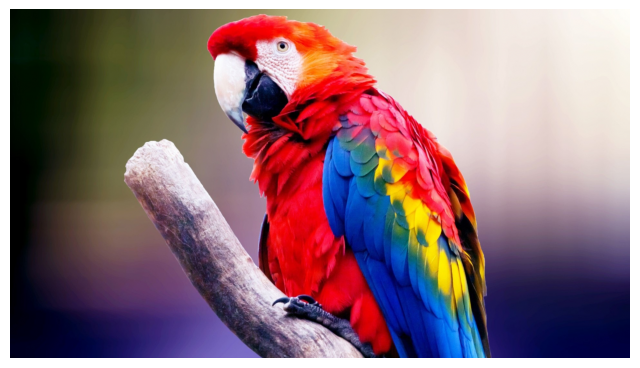

In [ ]:
parrot = get_image(parrot_url)
show_image(parrot)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

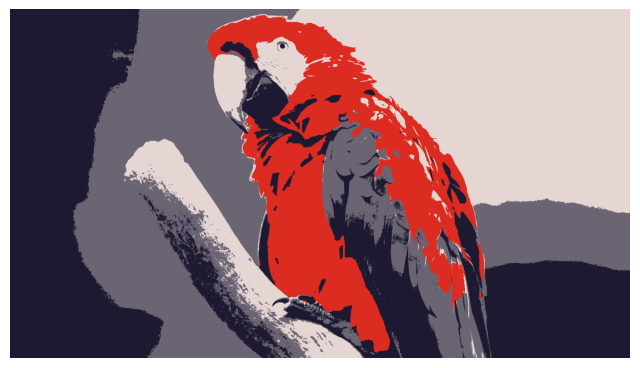

In [ ]:
from sklearn.cluster import KMeans


def scatter3D(array, n_samples=100):
    array=parrot.reshape(-1, 3)
    
    shuffled_array = sample_array(array, n_samples=n_samples)
    fig = plt.Figure()
    ax = plt.axes(projection='3d')

    x = shuffled_array[:, 0]
    y = shuffled_array[:, 1]
    z = shuffled_array[:, 2]
    ax.scatter(x, y, z)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel("Blue")

def flat_array(array):
    return array.reshape(-1, 3)

def predict(image, model):
    """
    """
    clusters = model.predict(flat_array(image))
    new_flat_image = model.cluster_centers_[clusters]
    return new_flat_image.reshape(image.shape[0], image.shape[1], 3)

def cluster_colors(image, n_colors=4, n_samples=5000):
    flat_image = flat_array(image)
    sampled_images_idx = np.random.choice(flat_image.shape[0], n_samples, replace=False)
    
    # Cluster
    model = KMeans(
        n_clusters=n_colors,
        max_iter=10000,
    )
    model.fit(flat_image[sampled_images_idx])

    # Create new image
    new_image = predict(image, model)
    return new_image

new_image = cluster_colors(parrot, n_colors=4)
show_image(new_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


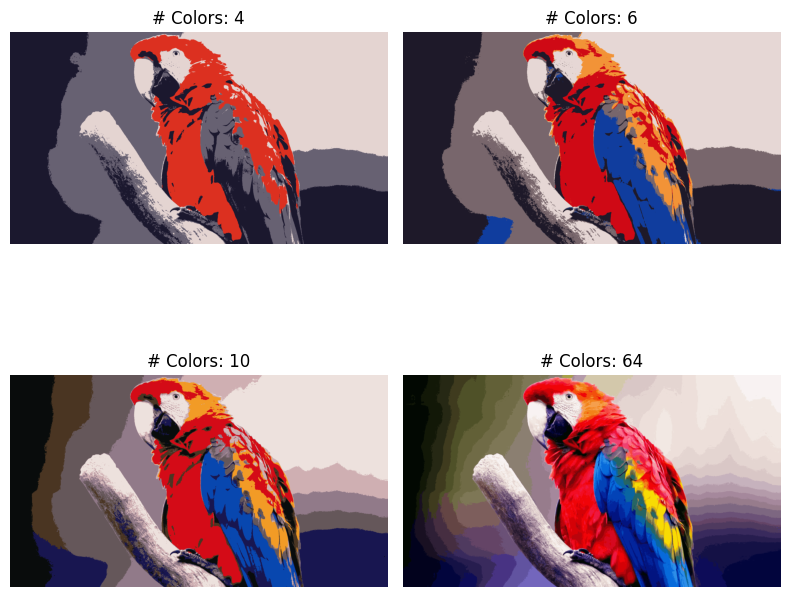

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes_flat = axes.flatten()

for idx, n_colors in enumerate([4, 6, 10, 64]):
    ax = axes_flat[idx]
    show_image(cluster_colors(parrot, n_colors=n_colors), ax=ax)
    ax.set_title(f"# Colors: {n_colors}")

fig.tight_layout()